# Food delivery data preprocess

## Import packages

In [11]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CPU times: user 11 µs, sys: 12 µs, total: 23 µs
Wall time: 34.1 µs


In [12]:
%%time
data = pd.read_csv('../Data/food_delivery_data.csv')
data.columns = ['store_id', 'promised delivery time', 'ordering time', 'latitude', 'longitude']
data.head(), data.shape

CPU times: user 30 ms, sys: 25.5 ms, total: 55.5 ms
Wall time: 92.1 ms


(   store_id promised delivery time        ordering time   latitude   longitude
 0         1    2019-01-01 07:30:00  2019-01-01 06:30:07  31.167880  121.536578
 1         1    2019-01-01 07:30:00  2019-01-01 06:35:02  31.175481  121.537246
 2         1    2019-01-01 08:00:00  2019-01-01 06:47:55  31.179777  121.553969
 3         1    2019-01-01 08:00:00  2019-01-01 06:48:59  31.175272  121.540357
 4         1    2019-01-01 07:45:00  2019-01-01 06:50:00  31.175667  121.548509,
 (23650, 5))

## Add new columns

In [13]:
# create a new column ('delivery time (second)')
import datetime

data['delivery time (s)'] = 0

for index, row in data.iterrows():
    t1 = datetime.datetime.strptime(data['ordering time'][index], '%Y-%m-%d %H:%M:%S')
    t2 = datetime.datetime.strptime(data['promised delivery time'][index], '%Y-%m-%d %H:%M:%S')
    diff = int((t2 - t1).total_seconds())
    data.at[index, 'delivery time (s)'] = diff

# create a new column ('delivery time (minute)')
data['ordering time'] = pd.to_datetime(data['ordering time'])
data['promised delivery time'] = pd.to_datetime(data['promised delivery time'])
data['delivery time (m)'] = (data['promised delivery time'] - data['ordering time']).astype('timedelta64[m]')

data.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m)
0,1,2019-01-01 07:30:00,2019-01-01 06:30:07,31.167880,121.536578,3593,59.0
1,1,2019-01-01 07:30:00,2019-01-01 06:35:02,31.175481,121.537246,3298,54.0
2,1,2019-01-01 08:00:00,2019-01-01 06:47:55,31.179777,121.553969,4325,72.0
3,1,2019-01-01 08:00:00,2019-01-01 06:48:59,31.175272,121.540357,4261,71.0
4,1,2019-01-01 07:45:00,2019-01-01 06:50:00,31.175667,121.548509,3300,55.0


## Number of orders per time interval

In [14]:
from datetime import datetime

data['create_at'] = data['ordering time'] 
data['create_at'] = data['create_at'].apply(lambda x: datetime.strptime("2021-10-10 " + datetime.strftime(x, "%H:%M:%S"), "%Y-%m-%d %H:%M:%S"))
data['create_at']

0       2021-10-10 06:30:07
1       2021-10-10 06:35:02
2       2021-10-10 06:47:55
3       2021-10-10 06:48:59
4       2021-10-10 06:50:00
                ...        
23645   2021-10-10 18:59:08
23646   2021-10-10 19:33:58
23647   2021-10-10 20:22:28
23648   2021-10-10 21:03:17
23649   2021-10-10 21:55:25
Name: create_at, Length: 23650, dtype: datetime64[ns]

In [15]:
data['count'] = 0
order_count_df = data[['create_at', 'count']].groupby(pd.Grouper(key="create_at", freq="45min")).count().reset_index()
order_count_df

,create_at,count
0,2021-10-10 06:00:00,186
1,2021-10-10 06:45:00,416
2,2021-10-10 07:30:00,621
3,2021-10-10 08:15:00,957
4,2021-10-10 09:00:00,1264
5,2021-10-10 09:45:00,1712
6,2021-10-10 10:30:00,1803
7,2021-10-10 11:15:00,1532
8,2021-10-10 12:00:00,1049
9,2021-10-10 12:45:00,865


In [16]:
rest_1 = data[data['store_id'] == 1]
rest_2 = data[data['store_id'] == 2]

rest_1['order_date'] = rest_1['ordering time'].dt.date
rest_2['order_date'] = rest_2['ordering time'].dt.date

rest_1['order_date'].unique().shape, rest_2['order_date'].unique().shape

/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


((14,), (14,))

In [26]:
order_count_df_1 = rest_1[['create_at', 'count']].groupby(pd.Grouper(key="create_at", freq="45min")).count().reset_index()
order_count_df_2 = rest_2[['create_at', 'count']].groupby(pd.Grouper(key="create_at", freq="45min")).count().reset_index()
order_count_df_1

,create_at,count
0,2021-10-10 06:00:00,103
1,2021-10-10 06:45:00,197
2,2021-10-10 07:30:00,301
3,2021-10-10 08:15:00,480
4,2021-10-10 09:00:00,593
5,2021-10-10 09:45:00,818
6,2021-10-10 10:30:00,810
7,2021-10-10 11:15:00,690
8,2021-10-10 12:00:00,554
9,2021-10-10 12:45:00,468


In [30]:
order_count_df_1['count'] = order_count_df_1['count'] // 14
order_count_df_2['count'] = order_count_df_2['count'] // 14

In [36]:
order_count_df_1

,create_at,count
0,2021-10-10 06:00:00,5
1,2021-10-10 06:45:00,15
2,2021-10-10 07:30:00,22
3,2021-10-10 08:15:00,34
4,2021-10-10 09:00:00,47
5,2021-10-10 09:45:00,63
6,2021-10-10 10:30:00,70
7,2021-10-10 11:15:00,60
8,2021-10-10 12:00:00,35
9,2021-10-10 12:45:00,28


In [37]:
order_count_df_1.to_csv("../Data/order_per_time_period_1.csv")
order_count_df_2.to_csv("../Data/order_per_time_period_2.csv")
print("Writing the orders per time to file.")

Writing the orders per time to file.


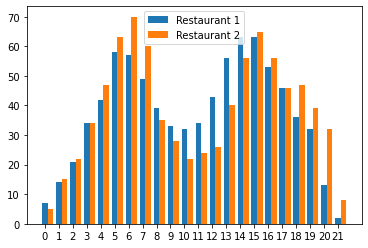

In [38]:
# visualization
total_width, n = 0.8, 2
width = total_width / n

plt.bar(order_count_df_1.index, order_count_df_1['count'], width=width, label='Restaurant 1')
plt.bar(order_count_df_2.index + width, order_count_df_2['count'], width=width, label='Restaurant 2')
plt.xticks(range(0,22))
plt.legend()
plt.savefig("../Figures/Orders per 45 mins.png", dpi=300)
plt.show()

## Number of orders per hour

In [26]:
hours = list(data['ordering time'].dt.hour.unique())
restaurants = list(data['store_id'].unique())
orders_per_hour = []

for r in restaurants:
    restau_df = data[data['store_id'] == r]
    restau_df['hour'] = restau_df['ordering time'].dt.hour
    restau_df_day_list = restau_df['ordering time'].dt.date.unique()
    restau_hour_df = restau_df['hour'].value_counts().sort_index()
    restau_hour_avg_df = (restau_hour_df / len(restau_df_day_list)).astype(np.int64)
    orders_per_hour.append(restau_hour_avg_df)

/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
orders_per_hour[0].values

array([12, 23, 41, 60, 80, 66, 51, 44, 44, 60, 83, 82, 71, 54, 43, 15])

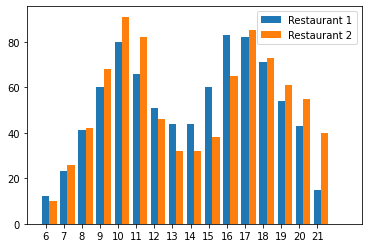

In [34]:
total_width, n = 0.8, 2
width = total_width / n

plt.bar(orders_per_hour[0].index, orders_per_hour[0].values, width=width, label='Restaurant 1')
plt.bar(orders_per_hour[1].index + width, orders_per_hour[1].values, width=width, label='Restaurant 2')
plt.xticks(range(6,22))
plt.legend()
plt.savefig("../Figures/Orders per hour.png", dpi=300)
plt.show()

## Number of orders per day

In [48]:
dates = list(data['ordering time'].dt.date.unique())
orders_per_day = []

for r in restaurants:
    restau_df = data[data['store_id'] == r]
    restau_df['day'] = restau_df['ordering time'].dt.date
    restau_date_df = restau_df['day'].value_counts().sort_index()
    orders_per_day.append(restau_date_df)

print(orders_per_day)
print(orders_per_day[0].index)

[2018-12-09     712
2018-12-10     711
2018-12-11     716
2018-12-12     711
2018-12-13     727
2018-12-14    1076
2018-12-15    1057
2018-12-30     682
2018-12-31     744
2019-01-01     938
2019-01-02     728
2019-01-03     848
2019-01-04    1089
2019-01-05     972
Name: day, dtype: int64, 2018-12-09    1039
2018-12-10     922
2018-12-11     888
2018-12-12     947
2018-12-13     871
2018-12-14    1185
2018-12-15    1286
2019-01-06     635
2019-01-07     677
2019-01-08     631
2019-01-09     621
2019-01-10     585
2019-01-11     793
2019-01-12     859
Name: day, dtype: int64]
Index([2018-12-09, 2018-12-10, 2018-12-11, 2018-12-12, 2018-12-13, 2018-12-14,
       2018-12-15, 2018-12-30, 2018-12-31, 2019-01-01, 2019-01-02, 2019-01-03,
       2019-01-04, 2019-01-05],
      dtype='object')


/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Promised delivery time

/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yangjingfeng/anaconda3/envs/d2l/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


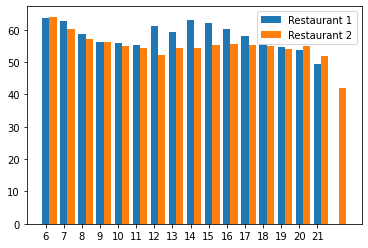

In [61]:
delivery_time_hour_list = []

for r in restaurants:
    restau_df = data[data['store_id'] == r]
    restau_df['hour'] = restau_df['ordering time'].dt.hour
    output_df = restau_df.groupby('hour')['delivery time (m)'].mean()
    delivery_time_hour_list.append(output_df)

plt.bar(delivery_time_hour_list[0].index, delivery_time_hour_list[0].values, width=width, label='Restaurant 1')
plt.bar(delivery_time_hour_list[1].index + width, delivery_time_hour_list[1].values, width=width, label='Restaurant 2')
plt.xticks(range(6,22))
plt.legend()
plt.savefig("../Figures/Delivery time per hour.png", dpi=300)
plt.show()

In [9]:
from geopy import distance

def distance_loc(p1, p2):
    '''
    Input: locations (latitude, longitude)
     - p1: location 1
     - p2: location 2
    Output: distance in km
    '''
    return distance.distance(p1, p2).km

In [ ]:
# get the boundary of the restaurants
restaurants = list(data['store_id'].unique())
restaurants_dict = {k:[] for k in restaurants}
boundary_dict = {k:[] for k in restaurants}
data['distance (m)'] = 0.0

for r in restaurants:
    df = data.loc[data['store_id'] == r]

    # get boundary
    west = df.longitude.min()
    east = df.longitude.max()
    south = df.latitude.min()
    north = df.latitude.max()
    boundary_dict[r] = [west, east, south, north]

    # restaurant location
    r_longi = np.average([west, east])
    r_latit = np.average([south, north])
    restaurants_dict[r] = (r_latit, r_longi)

restaurants_dict

{1: (31.1839785, 121.5382955), 2: (22.496323, 113.937388)}

In [19]:
for index, row in data.iterrows():
    r = row['store_id']
    data.at[index, 'distance (m)'] = distance_loc((row['latitude'], row['longitude']), restaurants_dict[r]) * 1000

data.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m)
0,1,2019-01-01 07:30:00,2019-01-01 06:30:07,31.167880,121.536578,3593,59.0,1.792374,1792.374399
1,1,2019-01-01 07:30:00,2019-01-01 06:35:02,31.175481,121.537246,3298,54.0,0.947436,947.436336
2,1,2019-01-01 08:00:00,2019-01-01 06:47:55,31.179777,121.553969,4325,72.0,1.564975,1564.975000
3,1,2019-01-01 08:00:00,2019-01-01 06:48:59,31.175272,121.540357,4261,71.0,0.985111,985.111196
4,1,2019-01-01 07:45:00,2019-01-01 06:50:00,31.175667,121.548509,3300,55.0,1.340554,1340.554487


In [28]:
corr = data['delivery time (s)'].corr(data['distance (m)'])
corr

0.051988352112812816

## Write data to file

In [26]:
# get date
dates = [i.strftime('%Y-%m-%d') for i in data['promised delivery time'].dt.date.unique()]
print(dates)

for r in restaurants:
    # for each restaurant
    df = data.loc[data['store_id'] == r]
    df.to_csv(f'../Data/restaurant_{r}.csv')
    print(f'Finish writing data with restaurant {r}.')

    # for each date
    for d in dates:
        df_time = df.loc[df['promised delivery time'].dt.date == datetime.datetime.strptime(d,'%Y-%m-%d').date()]
        df_time.to_csv(f'../Data/restaurant_{r}_{d}.csv')
        print(f'Finish writing data with restaurant {r} in day {d} to csv file.')

print('Finish data writing!')

['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-30', '2018-12-31', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12']
Finish writing data with restaurant 1.
Finish writing data with restaurant 1 in day 2019-01-01 to csv file.
Finish writing data with restaurant 1 in day 2019-01-02 to csv file.
Finish writing data with restaurant 1 in day 2019-01-03 to csv file.
Finish writing data with restaurant 1 in day 2019-01-04 to csv file.
Finish writing data with restaurant 1 in day 2019-01-05 to csv file.
Finish writing data with restaurant 1 in day 2018-12-09 to csv file.
Finish writing data with restaurant 1 in day 2018-12-10 to csv file.
Finish writing data with restaurant 1 in day 2018-12-11 to csv file.
Finish writing data with restaurant 1 in day 2018-12-12 to csv file.
Finish writing data with restaurant 1 in day 